In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Properties of 1D Fourier Transform

definition of Fourier transform an its inverser transformation

Fourier transform of periodic function

Relationship with discrete Fourier transformation

Some applications

Interpolation

Wavelets

# Definitions 

Source:

**Signal Analysis** 

Anasthasios Papoulis; McGRAW-Hill (international student edition)


The Fourier transformation of  function $f(t)$ is defined by equation:

$$
F(f) = \int_{-\infty}^{\infty} f(t) \cdot \exp\left[ -j \cdot 2\pi \cdot f \cdot t  \right] \cdot dt
$$

In a signal processing context variable $t$ is often referred to as **time** and $f$ is then referred to as **frequency**. And even if the meaning of variable $t$ and $f$ changes with the application context we still use the notion *time* and  *frequency* throughout.

If the Fourier transform $F(f)$ exists there is an *inverse* Fourier transform defined by equation:

$$
f(t) = \int_{-\infty}^{\infty} F(f) \cdot \exp \left[ j\cdot 2 \pi \cdot f \cdot t \right] \cdot df
$$

**Proof**

$$
f(t) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(t) \cdot  \exp \left[ j\cdot 2 \pi \cdot f \cdot \left(t-t'\right) \right] \cdot df \cdot dt'
$$

$$
f(t) = \int_{-\infty}^{\infty} f(t) \underbrace{\int_{-\infty}^{\infty}  \exp \left[ j\cdot 2 \pi \cdot f \cdot \left(t-t'\right) \right] \cdot df}_{\delta\left(t-t'\right)} \cdot dt' 
$$

Observing that in this equation the second integral is just the *delta* function:

$$
\delta\left(t-t'\right) = \int_{-\infty}^{\infty}  \exp \left[ j\cdot 2 \pi \cdot f \cdot \left(t-t'\right) \right] \cdot df
$$

We obtain:

$$
f(t) = \int_{-\infty}^{\infty} f(t) \cdot \delta\left(t-t'\right) \cdot dt' := f(t)
$$

------

## Excursion / Delta function 

In the definition of the delta function only the real part of $\exp \left[ j\cdot 2 \pi \cdot f \cdot \left(t-t'\right) \right] $ contributes to the integral. Hence the delta function is real function.


$$
\delta\left(t-t'\right) = \int_{-\infty}^{\infty}  \cos \left[ 2 \pi \cdot f \cdot \left(t-t'\right) \right] \cdot df
$$

Another approach defines the delta function as the limit of an integral like this:


$$
\delta\left(t-t'\right) = \lim_{a\to \infty} \int_{-a}^{a} \exp \left[ j\cdot 2 \pi \cdot f \cdot \left(t-t'\right) \right] \cdot df
$$

$$
\delta\left(t-t'\right) = \lim_{a\to \infty} \frac{\sin \left(2\pi \cdot a \cdot \left(t-t'\right) \right)}{\pi \cdot \left(t-t'\right) }
$$


For finite value of $a$ and the limiting case $\left(t-t'\right) \to 0$ we obtain:

$$
\lim_{\left(t-t'\right) \to 0} \frac{\sin \left(2\pi \cdot a \cdot \left(t-t'\right) \right)}{\pi \cdot \left(t-t'\right) } = 2 \cdot a
$$

Below it is shown how function $\frac{\sin \left(2\pi \cdot a \cdot \left(t-t'\right) \right)}{\pi \cdot \left(t-t'\right) }$ becomes more and more localised around $t=t'$ as factor $a$ increases.

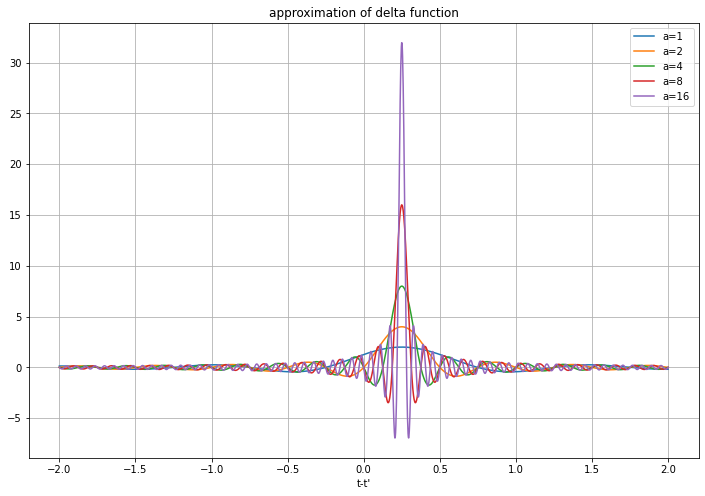

In [2]:
def sinDelta(a, t, ts):
    z0 = 1e-6
    args = np.pi * (t - ts)
    args[np.abs(args) < z0] = z0
    return np.sin(2*a*args)/args

t = np.linspace(-2,2, 2000)
delta_a_1 = sinDelta(1, t, 0.25)
delta_a_2 = sinDelta(2, t, 0.25)
delta_a_4 = sinDelta(4, t, 0.25)
delta_a_8 = sinDelta(8, t, 0.25)
delta_a_16 = sinDelta(16, t, 0.25)

# graphics
fig1 = plt.figure(1, figsize=[12, 8])
ax_f1 = fig1.add_subplot(1, 1, 1)
ax_f1.plot(t, delta_a_1, label="a=1")
ax_f1.plot(t, delta_a_2, label="a=2")
ax_f1.plot(t, delta_a_4, label="a=4")
ax_f1.plot(t, delta_a_8, label="a=8")
ax_f1.plot(t, delta_a_16, label="a=16")
ax_f1.legend()
ax_f1.grid(True)
ax_f1.set_xlabel('t-t\'')
ax_f1.set_title('approximation of delta function');

## Convolution

Definition

$$
g(t) = \int_{-\infty}^{\infty} f(v) \cdot h(t - v) \cdot  dv
$$

What is the Fourier transform $G(f)$ of the convolution function $g(t)$ ?

$$
G(f) = \int_{-\infty}^{\infty} g(t) \cdot \exp\left[ -j \cdot 2\pi \cdot f \cdot t  \right] \cdot dt
$$

$$
G(f) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(v) \cdot h(t - v) \cdot \exp\left[ -j \cdot 2\pi \cdot f \cdot t  \right] \cdot dt \cdot dv
$$

Applying variable substitution

$t'=t-v$ and therefore $t=t'+v$

yields

$$
G(f) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(v) \cdot h(t') \cdot \exp\left[ -j \cdot 2\pi \cdot f \cdot t'  \right] \cdot \exp\left[ -j \cdot 2\pi \cdot f \cdot v \right] \cdot dt' \cdot dv
$$

$$
G(f) = \underbrace{\int_{-\infty}^{\infty} f(v) \cdot \exp\left[ -j \cdot 2\pi \cdot f \cdot v \right] \cdot dv}_{F(f)} \cdot \underbrace{ \int_{-\infty}^{\infty} h(t') \cdot \exp\left[ -j \cdot 2\pi \cdot f \cdot t'  \right] \cdot dt'}_{H(f)} 
$$

$$
G(f) = F(f) \cdot H(f)
$$

# Periodic repetitions

Some useful properties of periodic functions are discussed here. We start with a function which is periodic in the time domain variable $t$.

Then we repeat this process with a frequency periodic function.

## Time Domain

A function $g(t)$ that is repeated with period $T_p$ may be expressed by an infinite summation.

$$
g_{p}(t) = \sum_{n=-\infty}^{\infty} g\left(t + n \cdot T_p \right)
$$

Since $g_{p}(t)$ is periodic it may be expressed by a Fourier series:

$$
g_{p}(t) = \sum_{n=-\infty}^{\infty} C_{n} \cdot \exp\left(j \cdot 2\pi \cdot n \cdot \frac{t}{T_p} \right)
$$

Denoting the fundamental frequency $f_s$ by $f_s= \frac{1}{T_p}$ a new equation for the Fourier series results:

$$
g_{p}(t) = \sum_{n=-\infty}^{\infty} C_{n} \cdot \exp\left(j \cdot 2\pi \cdot n \cdot f_s \cdot t \right)
$$

The coefficients $C_n$ of the Fourier series are computed from:

$$
\int_{0}^{T_p} g_{p}(t) \cdot \exp\left(-j \cdot 2\pi \cdot m \cdot f_s \cdot t \right) \cdot dt = \sum_{n=-\infty}^{\infty} C_{n} \cdot \int_{0}^{T_p} \exp\left(j \cdot 2\pi \cdot (n-m) \cdot f_s \cdot t \right) \cdot dt
$$

The integral on the right hand side of the equation is different from $0$ only if $m=n$.

$$
\int_{0}^{T_p} \exp\left(j \cdot 2\pi \cdot (n-m) \cdot f_s \cdot t \right) \cdot dt = \begin{cases} 0 & m \ne n\\
T_p & m == n\end{cases}
$$

Therefore Fourier coefficients $C_m$ are computed from:

$$
C_m = \frac{1}{T_p} \int_{0}^{T_p} g_{p}(t) \cdot \exp\left(-j \cdot 2\pi \cdot m \cdot f_s \cdot t \right) \cdot dt
$$

----

## Frequency Domain

Repeating Fourier transform $G(f)$ with period $f_p$ gives a periodic function $U_p(f)$:

$$
U_p(f) = \sum_{n=-\infty}^{\infty} G\left(f + n \cdot f_p\right)
$$

Since $U_{p}(f)$ is periodic it may be expressed by a Fourier series:

$$
U_{p}(f) = \sum_{n=-\infty}^{\infty} D_{n} \cdot \exp\left(-j \cdot 2\pi \cdot n \cdot \frac{f}{f_p} \right)
$$

Denoting the fundamental time increment $t_s$ by $t_s=\frac{1}{f_p}$ a new equation for the Fourier series results:

$$
U_{p}(f) = \sum_{n=-\infty}^{\infty} D_{n} \cdot \exp\left(-j \cdot 2\pi \cdot n \cdot t_s \cdot f\right)
$$

The coefficients $U_n$ of the Fourier series are computed from:

$$
\int_{0}^{f_p} U_{p}(f) \cdot \exp\left(j \cdot 2\pi \cdot m \cdot t_s \cdot f \right) \cdot df = \sum_{n=-\infty}^{\infty} D_{n} \cdot \int_{0}^{f_p} \exp\left(j \cdot 2\pi \cdot \left(m-n\right) \cdot t_s \cdot f \right) \cdot df
$$

The integral on the right hand side of the equation is different from $0$ only if $m=n$.

$$
\int_{0}^{f_p} \exp\left(j \cdot 2\pi \cdot (m-n) \cdot t_s \cdot f \right) \cdot df = \begin{cases} 0 & m \ne n\\
f_p & m == n\end{cases}
$$

Therefore Fourier coefficients $D_m$ are computed from:

$$
D_m = \frac{1}{f_p} \int_{0}^{f_p} U_{p}(f) \cdot \exp\left(j \cdot 2\pi \cdot m \cdot t_s \cdot f \right) \cdot df
$$

# Poisson sum formula

## Time Domain

Inserting the definition of periodic function $g_p(t)$ into the equation of Fourier coefficients $C_m$ gives a more useful expression.

$$
C_m = \frac{1}{T_p}  \sum_{n=-\infty}^{\infty} \int_{0}^{T_p} g\left(t + n \cdot T_p \right) \cdot \exp\left(-j \cdot 2\pi \cdot m \cdot f_s \cdot t \right) \cdot dt
$$

Doing variable substitution $t'= t + n \cdot T_p$:

$$
C_m = \frac{1}{T_p}  \sum_{n=-\infty}^{\infty} \int_{n\cdot T_p}^{(n+1)\cdot T_p} g\left(t'\right) \cdot \exp\left(-j \cdot 2\pi \cdot m \cdot f_s \cdot \left(t' - n \cdot T_P\right) \right) \cdot dt'\\
C_m = \frac{1}{T_p}  \sum_{n=-\infty}^{\infty} \int_{n\cdot T_p}^{(n+1)\cdot T_p} g\left(t'\right) \cdot \exp\left(-j \cdot 2\pi \cdot m \cdot f_s \cdot t'\right) \cdot dt'
$$

The combination of the *infinite* sum and the *finite* integral can be compactly expressed by an integral with infinite limits. The integral is just the value of the Fourier transform $G(f)$ at a the specific frequency $m \cdot f_s$:

$$
C_m = \frac{1}{T_p} \underbrace{\int_{-\infty}^{\infty} g\left(t'\right) \cdot \exp\left(-j \cdot 2\pi \cdot m \cdot f_s \cdot t'\right) \cdot dt'}_{G(m \cdot f_s)}\\
C_m = \frac{1}{T_p} \cdot G(m \cdot f_s)
$$

Finally the periodic function can be written as infinite series

$$
g_{p}(t) = \frac{1}{T_p} \cdot \sum_{n=-\infty}^{\infty} G(n \cdot f_s) \cdot \exp\left(j \cdot 2\pi \cdot n \cdot f_s \cdot t\right)
$$

This equation is often referred to as **Poisson Sum Formula**. It follows that the sample values $G(n \cdot f_s)$ of the Fourier transform $G(f)$ equal the Fourier series coefficients of a periodic function $T_p \cdot g_p(t)$.

### Application

Applying a time shift $\tau$ results in a slightly modified set of Fourier series coefficients:


$$
g_{p}(t-\tau) = \frac{1}{T_p} \cdot \sum_{n=-\infty}^{\infty} G(n \cdot f_s) \cdot \exp\left(-j \cdot 2\pi \cdot n \cdot f_s \cdot \tau \right) \cdot \exp\left(j \cdot 2\pi \cdot n \cdot f_s \cdot t\right)
$$

## Frequency domain

Inserting the definition of periodic function $U_p(f)$ into the equation of Fourier coefficients $D_m$ gives a more useful expression.

$$
D_m = \frac{1}{f_p} \sum_{n=-\infty}^{\infty} \int_{0}^{f_p} G\left(f + n \cdot f_p\right) \cdot \exp\left(j \cdot 2\pi \cdot m \cdot t_s \cdot f \right) \cdot df
$$

Doing variable substitution $f'= f + n \cdot f_p$:

$$
D_m = \frac{1}{f_p} \sum_{n=-\infty}^{\infty} \int_{n \cdot f_p}^{(n+1) \cdot f_p} G\left(f'\right) \cdot \exp\left(j \cdot 2\pi \cdot m \cdot t_s \cdot f' \right) \cdot df'
$$

The combination of the *infinite* sum and the *finite* integral can be compactly expressed by an integral with infinite limits. The integral is just the value of the inverse Fourier transform $g(f)$ at a the specific time instant $m \cdot t_s$:


$$
D_m = \frac{1}{f_p} \underbrace{\int_{-\infty}^{\infty} G\left(f'\right) \cdot \exp\left(j \cdot 2\pi \cdot m \cdot t_s \cdot f' \right) \cdot df'}_{g\left(m \cdot t_s \right)}
$$

Finally the periodic function $U_{p}(f)$ can be written as infinite series

$$
U_{p}(f) = \frac{1}{f_p} \sum_{n=-\infty}^{\infty} g\left(n \cdot t_s \right)  \cdot \exp\left(-j \cdot 2\pi \cdot n \cdot t_s \cdot f\right)
$$

## From Fourier series to Discrete Fourier series

### Time Domain

The periodic function $g_p(t)$ is sampled at equidistant time instants $t=m \cdot t_s$. The sampling time $t_s$ is defined as an integer fraction of the period $T_p$. $t_s=\frac{T_p}{N}$. ($N$ samples per period $T_p$)

$$
g_{p}\left(m \cdot t_s\right) = \frac{1}{T_p} \cdot \sum_{n=-\infty}^{\infty} G(n \cdot f_s) \cdot \exp\left(j \cdot 2\pi \cdot n \cdot m \cdot f_s \cdot t_s\right)\\
g_{p}\left(m \cdot t_s\right) = \frac{1}{T_p} \cdot \sum_{n=-\infty}^{\infty} G(n \cdot f_s) \cdot \exp\left(j \cdot 2\pi \cdot n \cdot m \cdot f_s \cdot T_p \cdot \frac{1}{N}\right)\\
g_{p}\left(m \cdot t_s\right) = \frac{1}{T_p} \cdot \sum_{n=-\infty}^{\infty} G(n \cdot f_s) \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot n \cdot m \right)
$$

------

Using indices

$$
n = k + r \cdot N\\
k = 0, ..., N-1\\
r = ..., -1, 0, 1, ...
$$

samples $g_{p}\left(m \cdot t_s\right)$ are given by:


$$
g_{p}\left(m \cdot t_s\right) = \frac{1}{T_p} \cdot \sum_{k=0}^{N-1} \sum_{r=-\infty}^{\infty} G\left(\left(k+r \cdot N\right) \cdot f_s\right) \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot \left(k+r \cdot N\right) \cdot m \right)\\
g_{p}\left(m \cdot t_s\right) = \frac{1}{T_p} \cdot \sum_{k=0}^{N-1} \underbrace{\sum_{r=-\infty}^{\infty} G\left(\left(k+r \cdot N\right) \cdot f_s\right)}_{G_a\left(k \cdot f_s\right)} \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot k \cdot m \right)
$$

Here $G_a\left(k \cdot f_s\right)$ denote the *aliased* coefficients defined by equation:

$$
G_a\left(k \cdot f_s\right) = \sum_{r=-\infty}^{\infty} G\left(\left(k+r \cdot N\right) \cdot f_s\right)
$$

Apparently the aliased coefficients $G_a$ are periodic with period $N \cdot f_s$:

$$
G_a\left(k \cdot f_s\right) = G_a\left(k \cdot f_s + m \cdot N \cdot f_s\right)
$$


$$
g_{p}\left(m \cdot t_s\right) = \frac{1}{T_p} \cdot \sum_{k=0}^{N-1} G_a\left(k \cdot f_s\right)  \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot k \cdot m \right)
$$

-----------

### How to get $G_a\left(k \cdot f_s\right)$ from $g_a\left(k\cdot t_s \right)$

**Recipe**

$$
\sum_{m=0}^{N-1} g_{p}\left(m \cdot t_s\right) \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot n \cdot m \right) = \frac{1}{T_p} \cdot \sum_{k=0}^{N-1} G_a\left(k \cdot f_s\right) \underbrace{\sum_{m=0}^{N-1} \exp\left(j \cdot \frac{2\pi}{N} \cdot \left(k-n\right) \cdot m \right)}_{N \text{ if k=n }; 0 \text{ otherwise}}\\
G_a\left(k \cdot f_s\right) = \frac{T_p}{N} \cdot \sum_{m=0}^{N-1} g_{p}\left(m \cdot t_s\right) \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot n \cdot m \right) 
$$

### Frequency Domain

The periodic function $U_{p}(f)$ is sampled at equidistant frequencies $f=m \cdot f_s$. Specifically we choose $f_s=\frac{1}{T_p}$. With this choice we have $t_s \cdot f_s = \frac{1}{N}$. 

$$
U_{p}(m \cdot f_s) = \frac{1}{f_p} \sum_{n=-\infty}^{\infty} g\left(n \cdot t_s \right)  \cdot \exp\left(-j \cdot 2\pi \cdot n \cdot t_s \cdot m \cdot f_s\right)\\
U_{p}(m \cdot f_s) = \frac{1}{f_p} \sum_{n=-\infty}^{\infty} g\left(n \cdot t_s \right)  \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot n \cdot m \right)
$$

------

Using indices

$$
n = k + r \cdot N\\
k = 0, ..., N-1\\
r = ..., -1, 0, 1, ...
$$

samples $U_{p}(m \cdot f_s)$ are given by:

$$
U_{p}(m \cdot f_s) = \frac{1}{f_p} \sum_{k=0}^{N-1} \underbrace{\sum_{r=-\infty}^{\infty} g\left(k\cdot t_s +r \cdot N \cdot t_s \right)}_{g_a\left(k\cdot t_s \right)} \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot k \cdot m \right)
$$

Here $g_a\left(k\cdot t_s \right)$ denote the *aliased* coefficients defined by equation:

$$
g_a\left(k\cdot t_s \right) = \sum_{r=-\infty}^{\infty} g\left(k\cdot t_s +r \cdot \underbrace{N \cdot t_s}_{T_p} \right) = \sum_{r=-\infty}^{\infty} g\left(k\cdot t_s +r \cdot T_p \right)
$$

The aliased coefficients are periodic :

$$
g_a\left(k\cdot t_s \right) = g_a\left(k\cdot t_s + M \cdot T_p\right)
$$


Only if the function $g(t)$ is time limited for an interval of duration $\le T_p$ the samples of  $g_a\left(k\cdot t_s \right)$ can be used to *recover* the original samples  $g\left(k\cdot t_s \right)$.


$$
U_{p}(m \cdot f_s) = \frac{1}{f_p} \sum_{k=0}^{N-1} g_a\left(k\cdot t_s \right)  \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot k \cdot m \right)
$$

-----------

### How to get $g_a\left(k\cdot t_s \right)$ from $U_{p}(m \cdot f_s)$

**Recipe**

$$
\sum_{m=0}^{N-1} U_{p}(m \cdot f_s) \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot n \cdot m \right) = \frac{1}{f_p} \sum_{k=0}^{N-1} g_a\left(k\cdot t_s \right) \cdot \underbrace{\sum_{m=0}^{N-1} \exp\left(j \cdot \frac{2\pi}{N} \cdot \left(n-k\right) \cdot m \right)}_{N  \text{ if }k=n; \text{ otherwise }0}\\
g_a\left(n\cdot t_s \right) = \frac{f_p}{N} \cdot \sum_{m=0}^{N-1} U_{p}(m \cdot f_s) \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot n \cdot m \right)
$$

**Summary:**

1) Samples of $U_{p}(m \cdot f_s)$ are related to samples $g_a\left(k\cdot t_s \right)$ via a discrete Fourier series.

2) If $g(t)$ is even time limited, samples $U_{p}(m \cdot f_s)$ are even directly related to the samples $g(\left(k\cdot t_s \right))$ .

3) ccc

# 1D Discrete Fourier transform (DFT)

The 1D discrete Fourier transform defines a method to transform a discrete Fourier series into another discrete Fourier series.

Let us defines a series of $N$ coefficients $A_m$ with $m := [0, ..., N-1]$ and another series of $N$ coefficients $a_k$ with $k := [0, ..., N-1]$.

Let coefficients $a_k$ be defined by finite sum (*trigonometric polynomial*) like this:

$$
a_k = \frac{1}{N} \cdot \sum_{m=0}^{N-1} A_m \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot m \cdot k\right)
$$

A similar approach allows to compute coeffients $A_m$ from coefficients $a_k$:

$$
\sum_{k=0}^{N-1} a_k \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot n \cdot k\right) = \frac{1}{N} \cdot \sum_{m=0}^{N-1} A_m \cdot \underbrace{\sum_{k=0}^{N-1}\exp\left(j \cdot \frac{2\pi}{N} \cdot \left(m-n\right) \cdot k\right)}_{N: \text{ if n=m }; 0: \text{ otherwise }}\\
A_n = \sum_{k=0}^{N-1} a_k \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot n \cdot k\right)
$$

---

## 1D DFT in `Scipy / Numpy`

see: https://docs.scipy.org/doc/scipy/tutorial/fft.html


Function `fft` implements the DFT:

$$
A_n = \sum_{k=0}^{N-1} a_k \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot n \cdot k\right)
$$

and `ifft` implements the inverse DFT (IDFT):

$$
a_k = \frac{1}{N} \cdot \sum_{m=0}^{N-1} A_m \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot m \cdot k\right)
$$

**Note**

By comparision we can see that the following expressions are *transform pairs*:

$$
\underbrace{\left(f_p \cdot U_{p}(n \cdot f_s)\right)}_{A_n} = \sum_{k=0}^{N-1} \underbrace{g_a\left(k\cdot t_s \right)}_{a_k} \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot k \cdot n \right)
$$

and

$$
\underbrace{g_a\left(k\cdot t_s \right)}_{a_k} = \frac{1}{N} \cdot \sum_{m=0}^{N-1} \underbrace{\left(f_p \cdot U_{p}(m \cdot f_s)\right)}_{A_m} \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot k \cdot m \right)
$$